# Empty-space based filtering

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from methods.method_empty_space import empty_space_denoising
from benchmark_demo.SignalBank import SignalBank

In [2]:
np.random.seed(0) 

# signal parameters
SNRin = 20
N = 2**9

sbank = SignalBank(N=N)
# s = sbank.signal_cos_chirp()
# s = sbank.signal_mc_modulated_tones()
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_synthetic_mixture()
# s = sbank.signal_mc_synthetic_mixture_2()
# s = sbank.signal_mc_impulses()


In [3]:
signal = add_snr(s,SNRin)
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, stft, stft_padded, Npad = get_spectrogram(signal, window = g)
output = empty_space_denoising(signal,return_dic=True)
s_r, mask = (output[key] for key in ('s_r','mask')) 
print(10*np.log10((np.sum(s**2))/(np.sum((s-s_r)**2))))

21.089186060339287


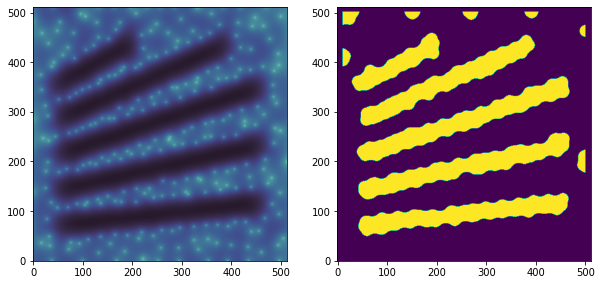

In [4]:
fig, ax = plt.subplots(1,2,figsize = (10,5))
ax[0].imshow(np.log10(S), origin='lower', cmap=cmocean.cm.deep)
ax[1].imshow(mask, origin='lower')
plt.show()